In [74]:
# two documents
# /content/drive/MyDrive/MLRG/merged.csv
# /content/drive/MyDrive/MLRG/combined_data.csv

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
merged_data = pd.read_csv('/content/drive/MyDrive/MLRG/merged_rename.csv')       #merged by aleyna
combined_data = pd.read_csv('/content/drive/MyDrive/MLRG/combined_data.csv')  # merged by torkepes

%load_ext autoreload
%autoreload 2

# basic info of Merged csv files

In [63]:
#merged data
#drop the ctrl
ctrl_columns = merged_data.filter(regex='ctrl').columns
merged_data.drop(columns=ctrl_columns, inplace=True)

print("First 5 rows of the merged data:")
print(merged_data.head())
print("\nDetails of merged data:")
print(f"Total rows: {merged_data.shape[0]}, Total columns: {merged_data.shape[1]}")
print("Column names:", merged_data.columns.tolist())

First 5 rows of the merged data:
   Unnamed: 0                       species  \
0           0  Streptococcus pneumoniae D39   
1           1  Streptococcus pneumoniae D39   
2           2  Streptococcus pneumoniae D39   
3           3  Streptococcus pneumoniae D39   
4           4  Streptococcus pneumoniae D39   

                                         upstream200  strpn_as_1_ge_tpm  \
0  TTACGTTTAGAAATTGAATCAATCAAAAAGAAAATCAAATAATTTG...         365.544548   
1  GATTGATTCTCTTAAAGCTTTAAATAGCGAAAAGGTGACCATTAGC...          49.964010   
2  CGTTGGGAAATTACACGTGTAGGAGCAGATATCAAAATAAAATGCA...         516.780668   
3  CATGTCATATGAAGATCTAGTGAAATACGGATCTGAAAAGGCCGTA...          96.223259   
4  GAACTCAGGTCTTTAACCGTGTTAAGATTGGAATTGGAAGACCTAA...          82.032415   

   strpn_as_2_ge_tpm  strpn_as_3_ge_tpm  strpn_bs_1_ge_tpm  strpn_bs_2_ge_tpm  \
0         404.899197         160.276922         275.323213         485.163745   
1          32.349780         131.458871          10.104460           4.

In [64]:
#Some processing and statistics based on practical implications

#Count how many species and each species data
filtered_columns = [col for col in merged_data.columns if col not in ['Unnamed: 0', 'species', 'upstream200']]
species = [col.split('_')[0] for col in filtered_columns]
species_counts = {spec: species.count(spec) for spec in set(species)}
print(species_counts)
unique_species_count = len(set(species))
print(f"Total unique species: {unique_species_count}")

{'legip': 33, 'sepi': 33, 'entfa': 33, 'spyo': 33, 'etec': 33, 'ngon': 33, 'staga': 33, 'achx': 33, 'frat': 33, 'upec': 33, 'hpj99': 33, 'mrsa': 33, 'pseudo': 33, 'agga': 33, 'salmt': 33, 'vibrio': 33, 'ypstb': 33, 'ssuis': 27, 'listeria': 33, 'epec': 33, 'hpg27': 33, 'bburg': 33, 'hinf': 33, 'acib': 33, 'mssa': 33, 'nmen': 33, 'shif': 33, 'mtb': 33, 'strpn': 33, 'burk': 33, 'campy': 33, 'klebs': 33}
Total unique species: 32


In [65]:
print("\nBasic statistics of the merged data:")
print(merged_data.describe())


Basic statistics of the merged data:
         Unnamed: 0  strpn_as_1_ge_tpm  strpn_as_2_ge_tpm  strpn_as_3_ge_tpm  \
count  96505.000000        2115.000000        2115.000000        2115.000000   
mean   48252.000000         472.730294         472.714628         472.621684   
std    27858.738201        2064.096260        2043.520521        2479.770911   
min        0.000000           0.000000           0.000000           0.000000   
25%    24126.000000          20.048605          22.716163          18.624659   
50%    48252.000000          89.151470          99.876135          81.449596   
75%    72378.000000         273.403493         279.163084         245.805208   
max    96504.000000       50038.057800       51001.908420       67603.712940   

       strpn_bs_1_ge_tpm  strpn_bs_2_ge_tpm  strpn_bs_3_ge_tpm  \
count        2115.000000        2115.000000        2115.000000   
mean          472.716366         472.660642         472.692049   
std          1651.863210        1575.169390

We can see that there are some condition data missing from ssuis. So, we need to find which species on which conditions are missing.

In [72]:
import pandas as pd
import numpy as np
import re

all_conditions = [
    'as', 'bs', 'li', 'mig', 'nd', 'ns', 'oss', 'oxs', 'sp', 'tm', 'vic'
]

species_list = [
    'legip', 'agga', 'acib', 'achx', 'bburg', 'campy', 'upec', 'epec',
    'hinf', 'hpg27', 'frat', 'burk', 'entfa', 'mtb', 'listeria', 'hpj99',
    'klebs', 'etec', 'salmt', 'sepi', 'nmen', 'ngon', 'pseudo', 'staga',
    'mrsa', 'ssuis', 'shif', 'strpn', 'ypstb', 'spyo', 'vibrio', 'mssa'
]

# Extract eligible columns
pattern = re.compile('|'.join([f"{species}_" for species in species_list]))
filtered_columns = [col for col in merged_data.columns if pattern.match(col)]
filtered_data = merged_data[filtered_columns]

missing_conditions_dict = {}

for species in species_list:
    species_columns = [col for col in filtered_columns if col.startswith(species)]
    species_conditions = set(col.split('_')[1] for col in species_columns)
    missing_conditions = set(all_conditions) - species_conditions

    # Add logic to detect if all column values are NaN
    for condition in all_conditions:
        condition_columns = [col for col in species_columns if f'_{condition}_' in col]
        if condition_columns:
            all_nan = all(filtered_data[col].isna().all() for col in condition_columns)
            if all_nan:
                missing_conditions.add(condition)

    if missing_conditions:
        missing_conditions_dict[species] = missing_conditions

# Print the missing conditions for each specie
for species, missing in missing_conditions_dict.items():
    print(f"Missing conditions for {species}: {missing}")


Missing conditions for legip: {'vic', 'bs'}
Missing conditions for bburg: {'bs'}
Missing conditions for hinf: {'bs'}
Missing conditions for hpg27: {'bs'}
Missing conditions for burk: {'bs'}
Missing conditions for mtb: {'vic'}
Missing conditions for hpj99: {'bs'}
Missing conditions for ssuis: {'mig', 'sp'}
Missing conditions for shif: {'ns', 'nd', 'li', 'mig', 'tm', 'bs', 'sp', 'vic', 'oss', 'oxs', 'as'}
Missing conditions for ypstb: {'ns', 'nd', 'li', 'mig', 'tm', 'bs', 'sp', 'vic', 'oss', 'oxs', 'as'}


Perform a visual analysis for each specie to see the distribution of data: data distribution

In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re


pattern = re.compile('|'.join([f"{species}_{condition}_" for species in species_list for condition in all_conditions]))
columns_to_keep = [col for col in merged_data.columns if pattern.search(col)]
filtered_data = merged_data[columns_to_keep]

# Rename columns (e.g. 'legip_as_1_ge_tpm' -> 'legip_as_1')
renamed_columns = {col: '_'.join(col.split('_')[:3]) for col in columns_to_keep}
filtered_data.rename(columns=renamed_columns, inplace=True)

# Visualize the data distribution of each specie under different conditions
for species in species_list:
    species_columns = [col for col in filtered_data.columns if col.startswith(species)]
    if species_columns:
        species_data = filtered_data[species_columns]

        # Drawing graphics
        plt.figure(figsize=(20, 10))
        species_data.boxplot()
        plt.title(f'Distribution of {species} under different conditions')
        plt.xticks(rotation=90)
        plt.ylabel('Values')
        plt.show()

        # Display basic statistics for each specie
        print(f"\nBasic statistics for {species}:")
        print(species_data.describe())


Output hidden; open in https://colab.research.google.com to view.

In [74]:
for species in species_list:
    species_columns = [col for col in filtered_data.columns if col.startswith(species)]
    if species_columns:
        species_data = filtered_data[species_columns]

        # Calculate the correlation matrix
        corr_matrix = species_data.corr()

        # Setting the drawing size
        plt.figure(figsize=(12, 10))

        # Heat mapping of correlations
        sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', fmt=".2f", linewidths=0.5)
        plt.title(f'Correlation Heatmap for {species}')
        plt.show()

Output hidden; open in https://colab.research.google.com to view.

# Basic info of combined_data

In [124]:
#combined_data
print("\nFirst 5 rows of the combined data:")
print(combined_data.head())
print("\nDetails of combined data:")
print(f"Total rows: {combined_data.shape[0]}, Total columns: {combined_data.shape[1]}")
print("Column names:", combined_data.columns.tolist())


First 5 rows of the combined data:
   Unnamed: 0                            Species   Chromosome  \
0           0  Achromobacter xylosoxidans SOLR10  NZ_CP025774   
1           1  Achromobacter xylosoxidans SOLR10  NZ_CP025774   
2           2  Achromobacter xylosoxidans SOLR10  NZ_CP025774   
3           3  Achromobacter xylosoxidans SOLR10  NZ_CP025774   
4           4  Achromobacter xylosoxidans SOLR10  NZ_CP025774   

                   Region  As_1 (GE) - TPM  As_2 (GE) - TPM  As_3 (GE) - TPM  \
0      complement(1..400)      4579.764521      2874.021275      2805.289041   
1   complement(980..2143)        14.339311        17.782257        23.076558   
2  complement(2164..3555)         8.624839        10.448941         3.816945   
3  complement(3599..4984)        21.127260        38.747719        23.426751   
4  complement(5049..5855)       338.906377       344.525203       239.579899   

   Bs_1 (GE) - TPM  Bs_2 (GE) - TPM  Bs_3 (GE) - TPM  ...  Sp_2 (GE) - TPM  \
0      3462.30

The 'Species' column represents each species in the species_list.
The columns in the table include multiple measurements under different conditions.

Examples:
'As_1 (GE) - TPM', 'As_2 (GE) - TPM', 'As_3 (GE) - TPM' corresponds to condition 'as'.


'Bs_1 (GE) - TPM', 'Bs_2 (GE) - TPM', 'Bs_3 (GE) - TPM' corresponds to condition 'bs'.


This pattern applies to all listed conditions (all_conditions).

'Species ID' and 'upstream200' provide a unique identifier for the species or genomic region and additional genetic or location information.

Columns without full nan values are more compact data

In [125]:
# Find all columns that are all NaN
nan_columns = combined_data.columns[combined_data.isna().all()].tolist()
print(nan_columns)

[]


The Species ID, Species, Chromosome: one-to-one correspondence

In [126]:
import pandas as pd

data = {
    'Species': [
        'Achromobacter xylosoxidans SOLR10', 'Acinetobacter baumannii AB5075-UW',
        'Aggregatibacter actinomycetemcomitans D7S-1', 'Borrelia burgdorferi B31',
        'Burkholderia pseudomallei K96243', 'Campylobacter jejuni subsp. jejuni 81-176',
        'Enterococcus faecalis OG1RF', 'Escherichia coli EPEC 0127:H6 E2348/69',
        'Escherichia coli ETEC H10407', 'Escherichia coli UPEC 536',
        'Francisella tularensis subsp. holarctica FSC200', 'Haemophilus influenzae 86-028NP',
        'Helicobacter pylori G27', 'Helicobacter pylori J99',
        'Klebsiella pneumoniae subsp. pneumoniae MGH 78578',
        'Legionella pneumophila subsp. pneumophila Philadelphia 1', 'Listeria monocytogenes EGD-e',
        'Mycobacterium tuberculosis H37Ra', 'Neisseria gonorrhoeae FA 1090',
        'Neisseria meningitidis serogroup C FAM18', 'Pseudomonas aeruginosa PAO1',
        'Salmonella enterica subsp. enterica serovar Typhimurium SL1344',
        'Staphylococcus\xa0aureus MRSA252', 'Staphylococcus\xa0aureus MSSA476',
        'Staphylococcus\xa0epidermidis 1457', 'Streptococcus agalactiae NEM316',
        'Streptococcus pneumoniae D39', 'Streptococcus pyogenes 5448',
        'Vibrio cholerae O1 biovar El Tor str. N16961', 'Streptococcus suis S10 -P1/7'
    ],
    'Species ID': [
        'ACHX', 'ACIB', 'AGGA', 'BBURG', 'BURK', 'Campy', 'ENTFA', 'EPEC', 'ETEC',
        'UPEC', 'FRAT', 'HINF', 'HP_G27', 'HPJ99', 'KLEBS', 'LEGIP', 'Listeria', 'MTB',
        'NGON', 'NMEN', 'PSEUDO', 'SALMT', 'MRSA', 'MSSA', 'SEPI', 'STAGA', 'STRPN',
        'SPYO', 'Vibrio', 'SSUIS'
    ],
    'Chromosome': [
        'NZ_CP025774', 'NZ_CP025775', 'NZ_CP008706', 'NZ_CP008707', 'NZ_CP008708',
        'NZ_CP008709', 'NC_017846', 'NC_000948', 'NC_000949', 'NC_000950', 'NC_000951',
        'NC_000952', 'NC_000953', 'NC_000954', 'NC_000955', 'NC_000956', 'NC_000957',
        'NC_001318', 'NC_001849', 'NC_001850', 'NC_001851', 'NC_001852', 'NC_001853',
        'NC_001854', 'NC_001855', 'NC_001856', 'NC_001857', 'NC_001903', 'NC_001904',
        'NC_006350'
    ]
}



# Check the number of unique values
unique_species = combined_data['Species'].nunique()
unique_species_id = combined_data['Species ID'].nunique()
unique_chromosome = combined_data['Chromosome'].nunique()

print(f"Number of unique Species values: {unique_species}")
print(f"Number of unique Species ID values: {unique_species_id}")
print(f"Number of unique Chromosome values: {unique_chromosome}")

# Check for one-to-one relationships
species_id_map = combined_data[['Species', 'Species ID']].drop_duplicates()
species_chromosome_map = combined_data[['Species', 'Chromosome']].drop_duplicates()

# Check if Species -> Species ID is one-to-one
is_species_id_unique = species_id_map.shape[0] == unique_species

# Check if Species -> Chromosome is one-to-one
is_species_chromosome_unique = species_chromosome_map.shape[0] == unique_species

print(f"Is Species to Species ID a one-to-one relationship: {is_species_id_unique}")
print(f"Is Species to Chromosome a one-to-one relationship: {is_species_chromosome_unique}")

# If Species, Species ID, and Chromosome are one-to-one, each species has a unique Species ID and Chromosome
is_unique_relationship = is_species_id_unique and is_species_chromosome_unique

print(f"Are Species, Species ID, and Chromosome a one-to-one relationship: {is_unique_relationship}")


Number of unique Species values: 30
Number of unique Species ID values: 30
Number of unique Chromosome values: 76
Is Species to Species ID a one-to-one relationship: True
Is Species to Chromosome a one-to-one relationship: False
Are Species, Species ID, and Chromosome a one-to-one relationship: False


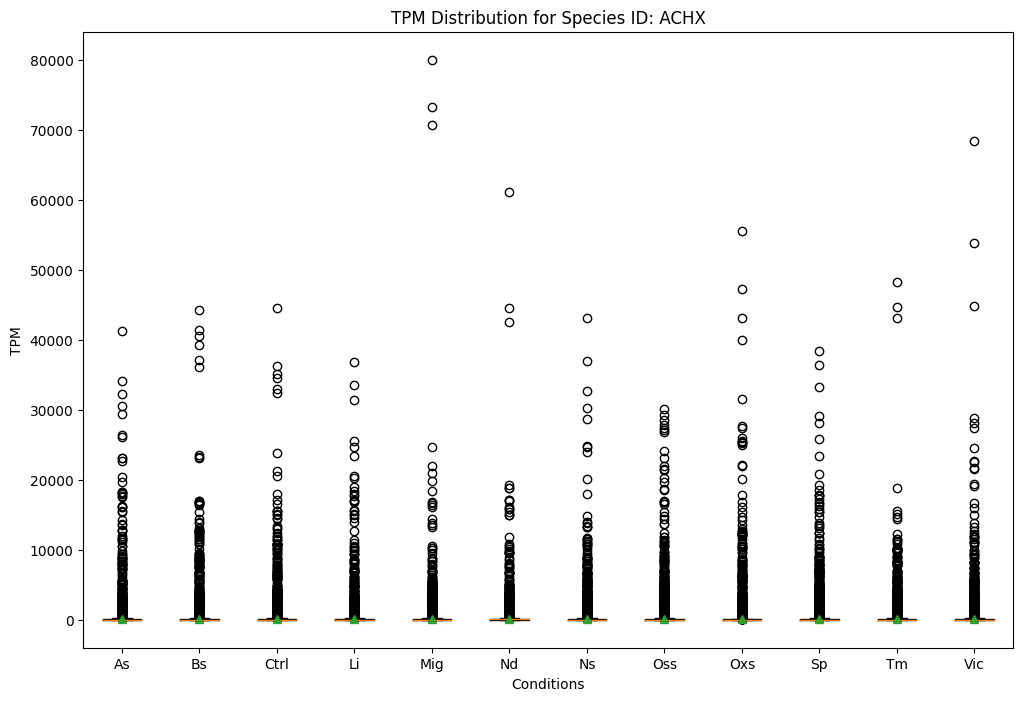

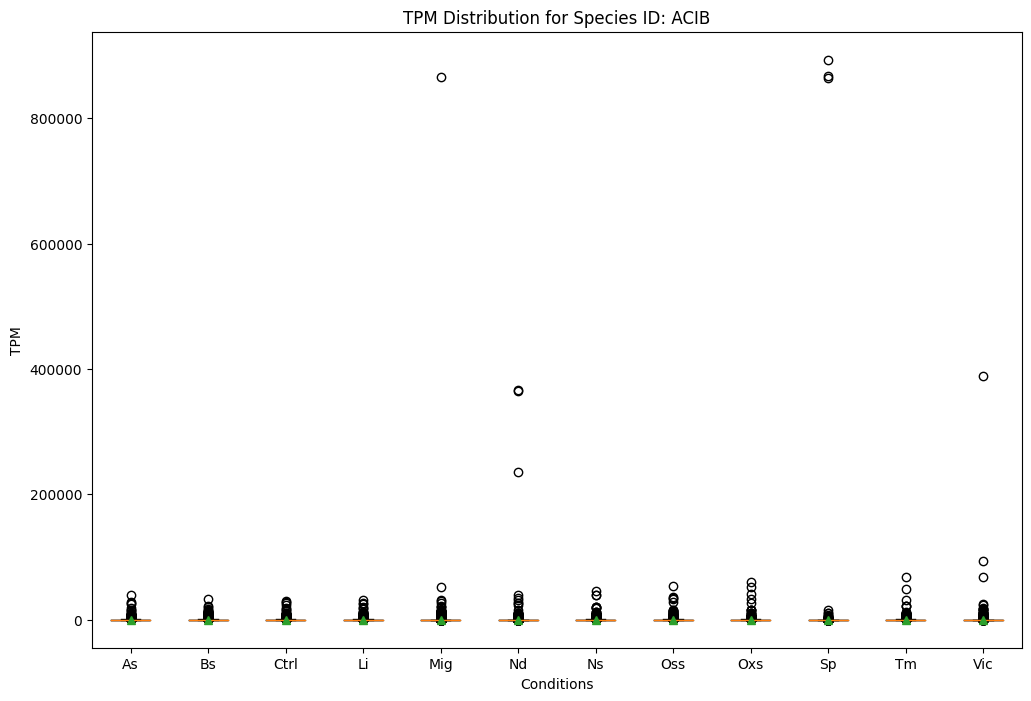

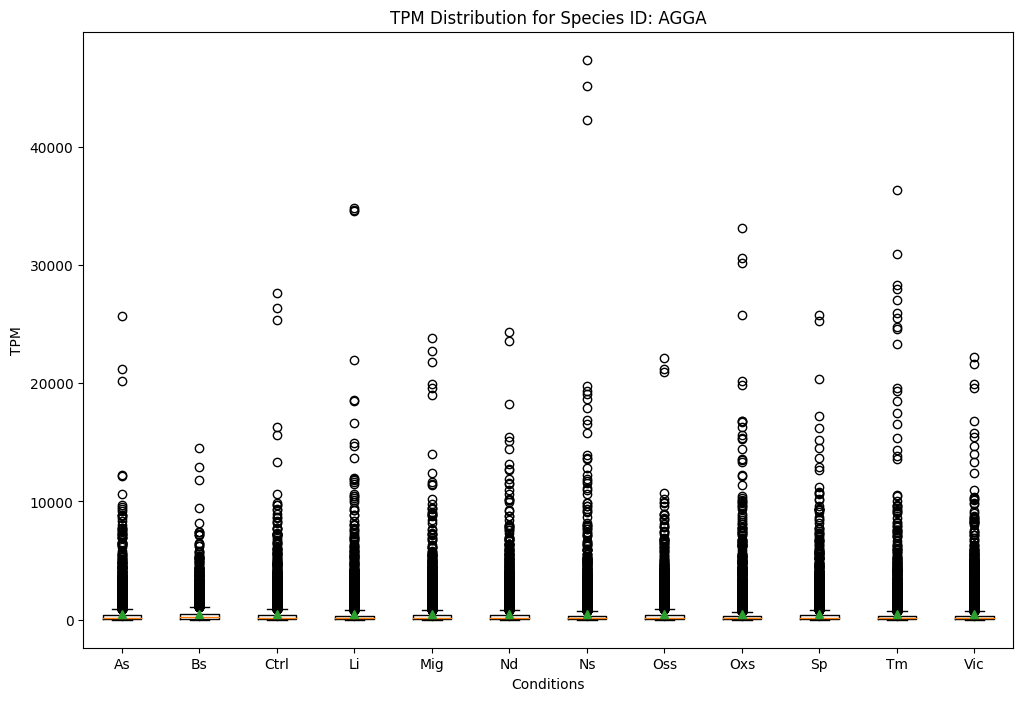

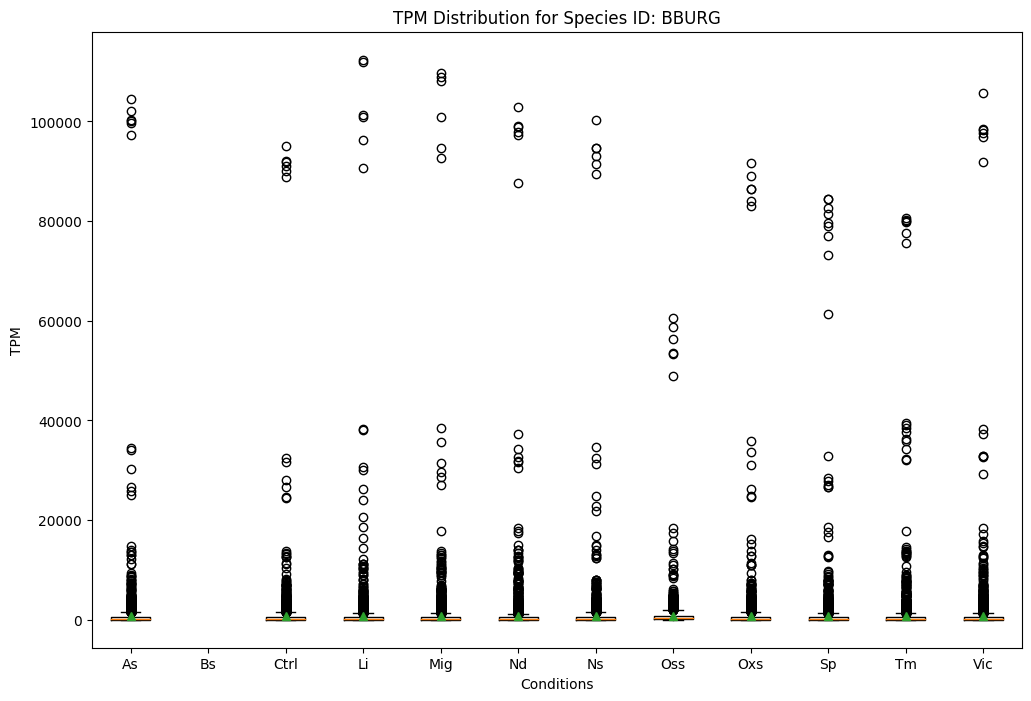

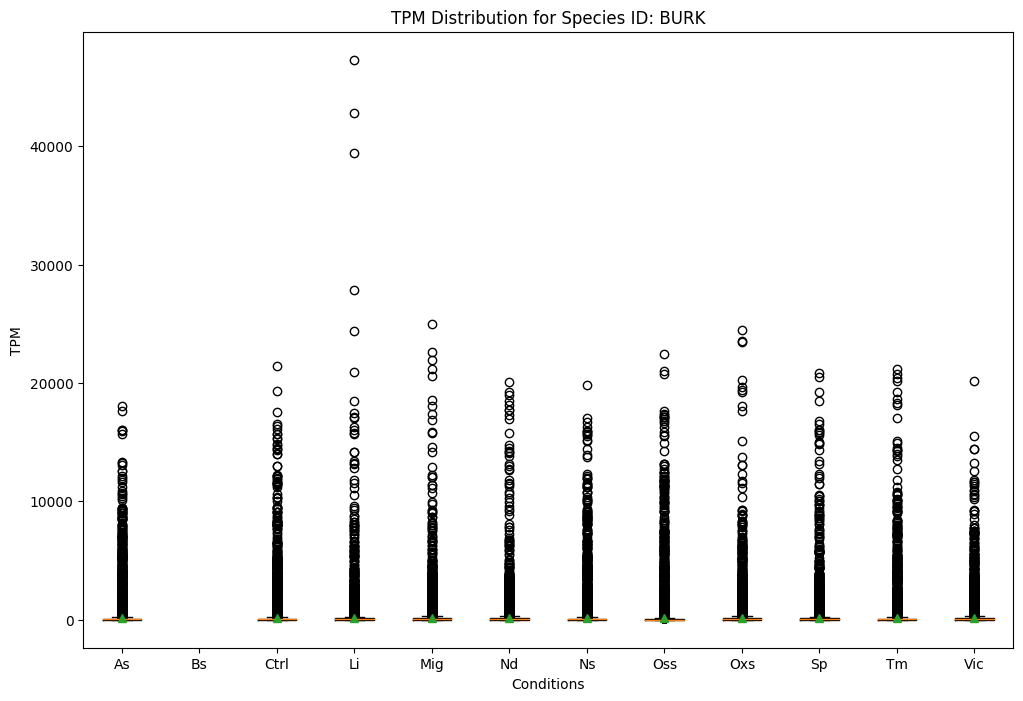

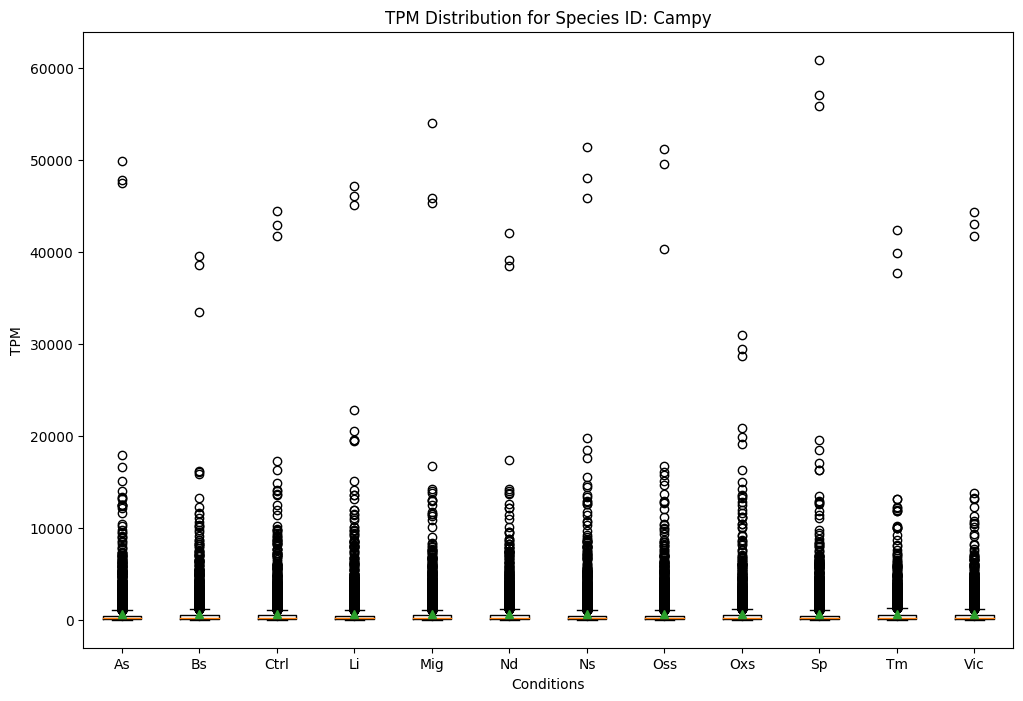

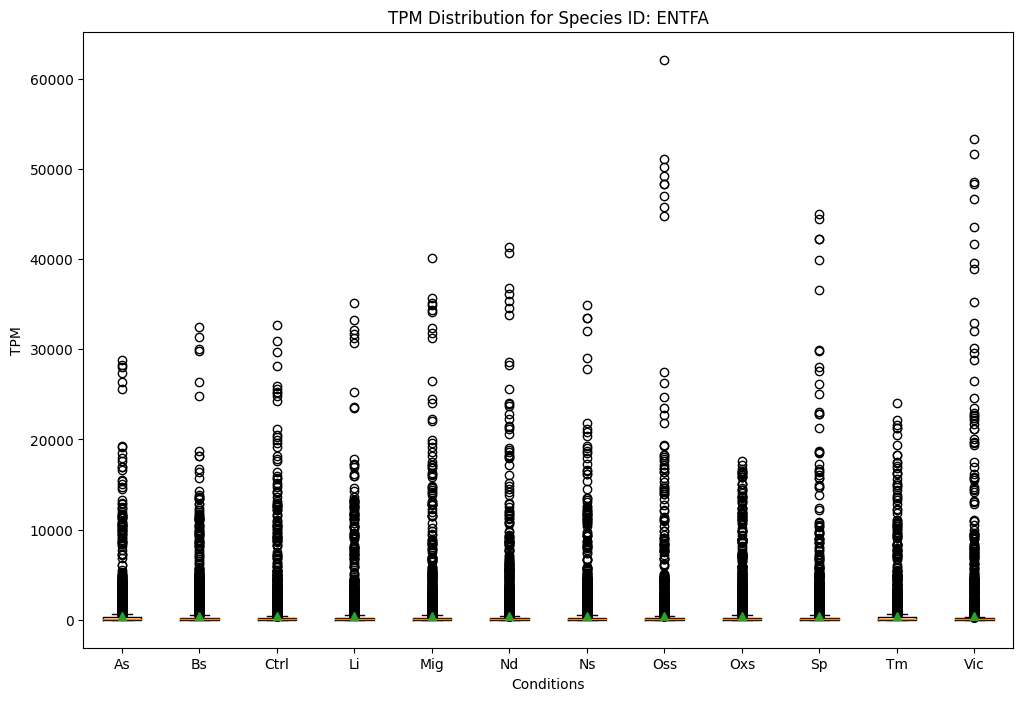

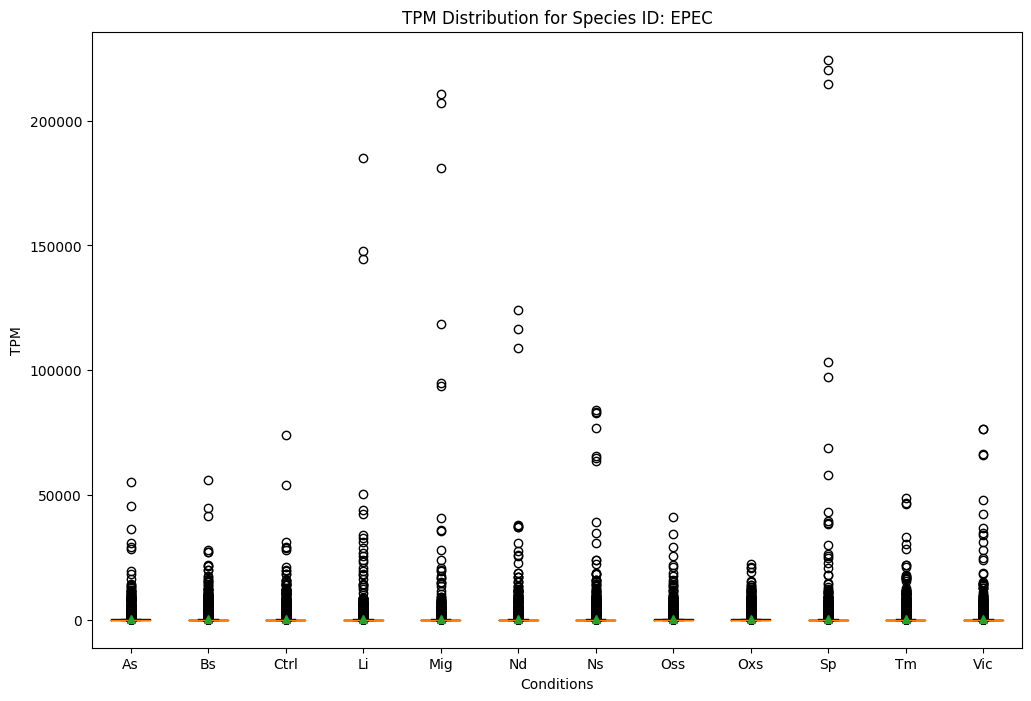

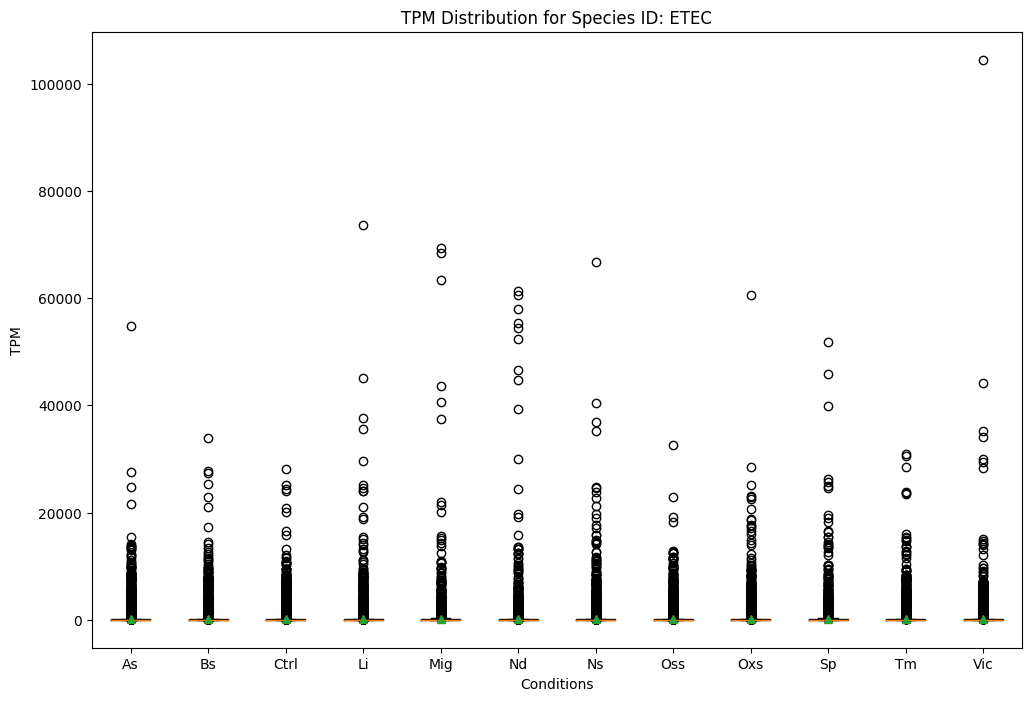

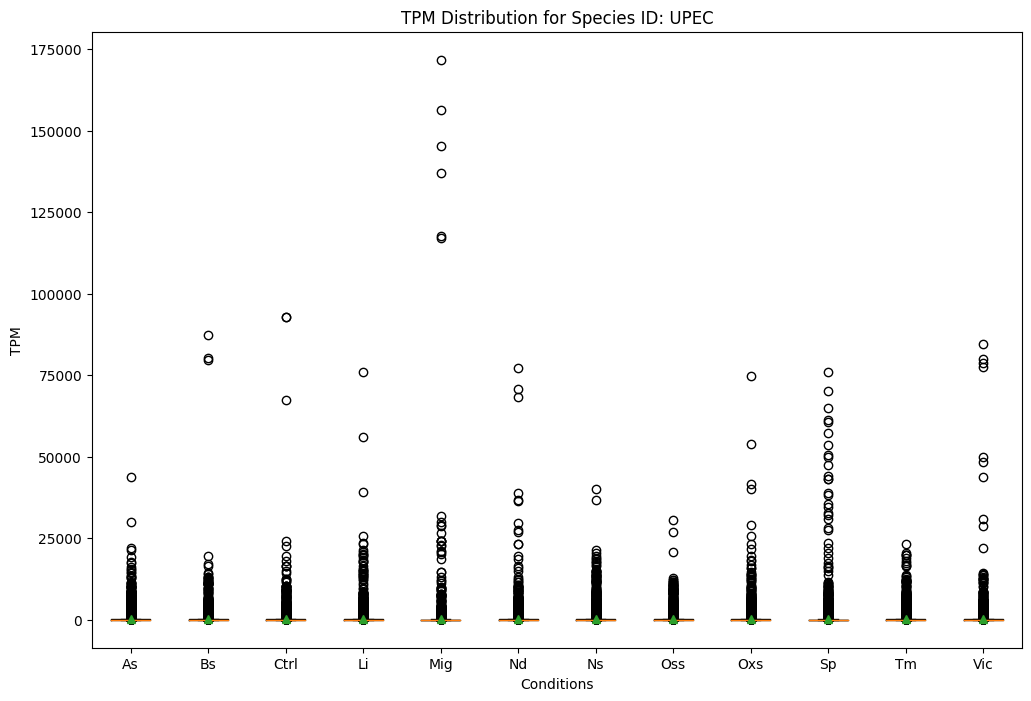

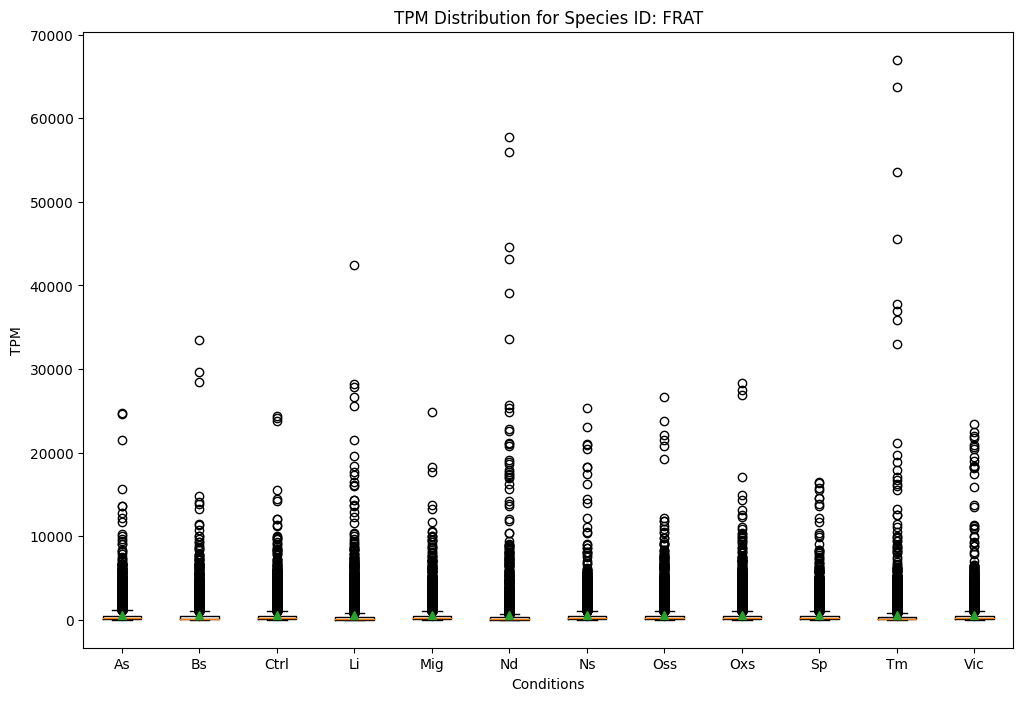

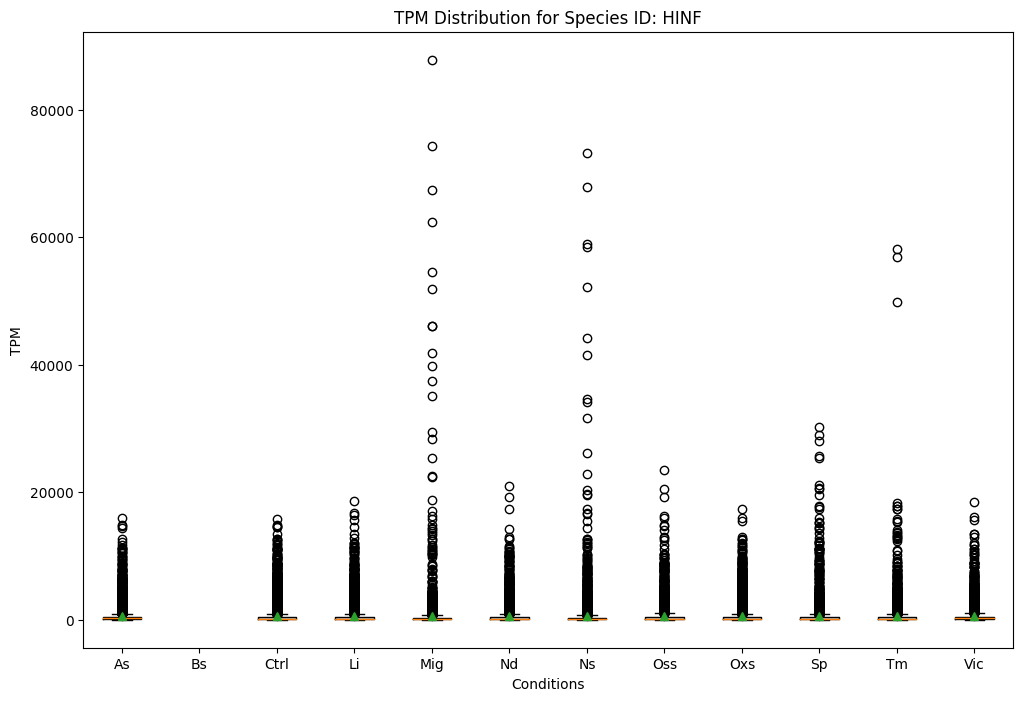

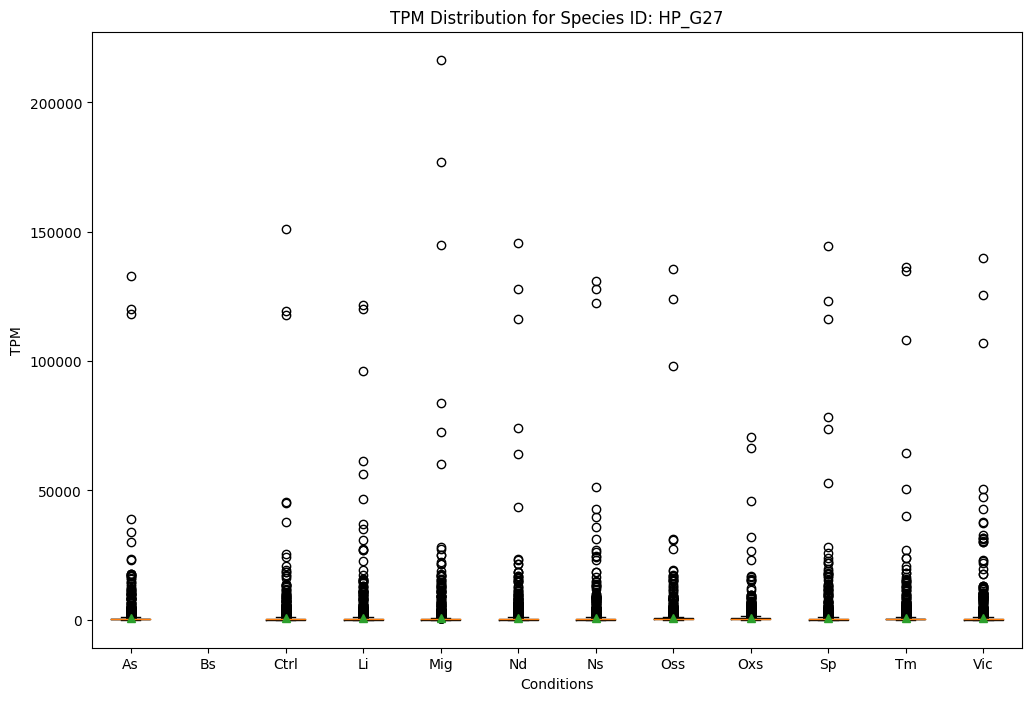

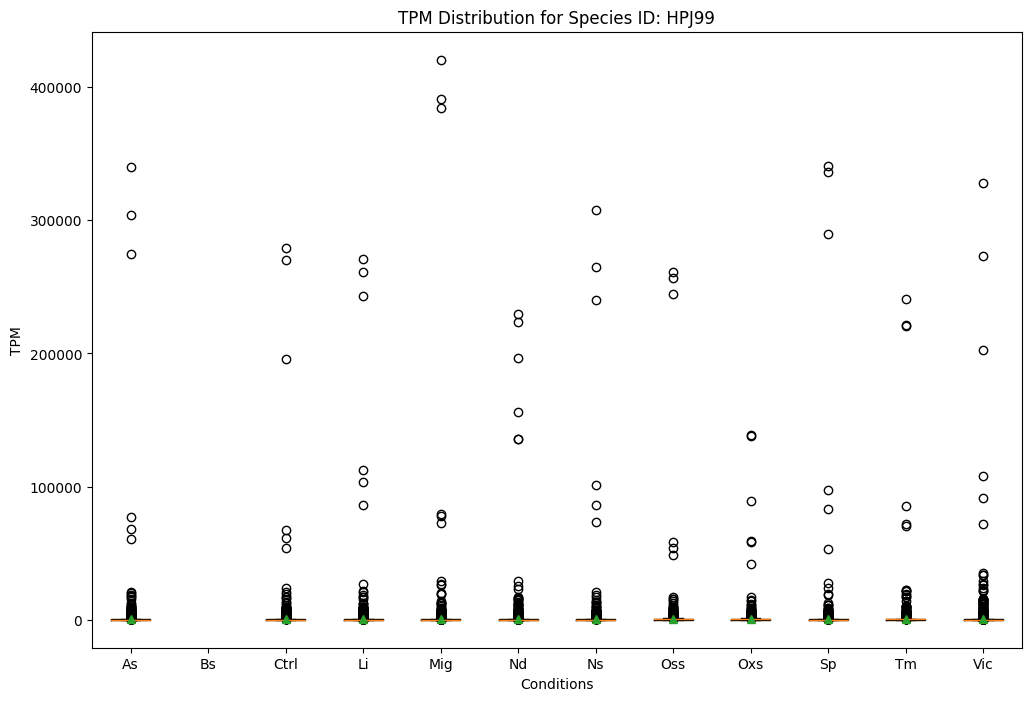

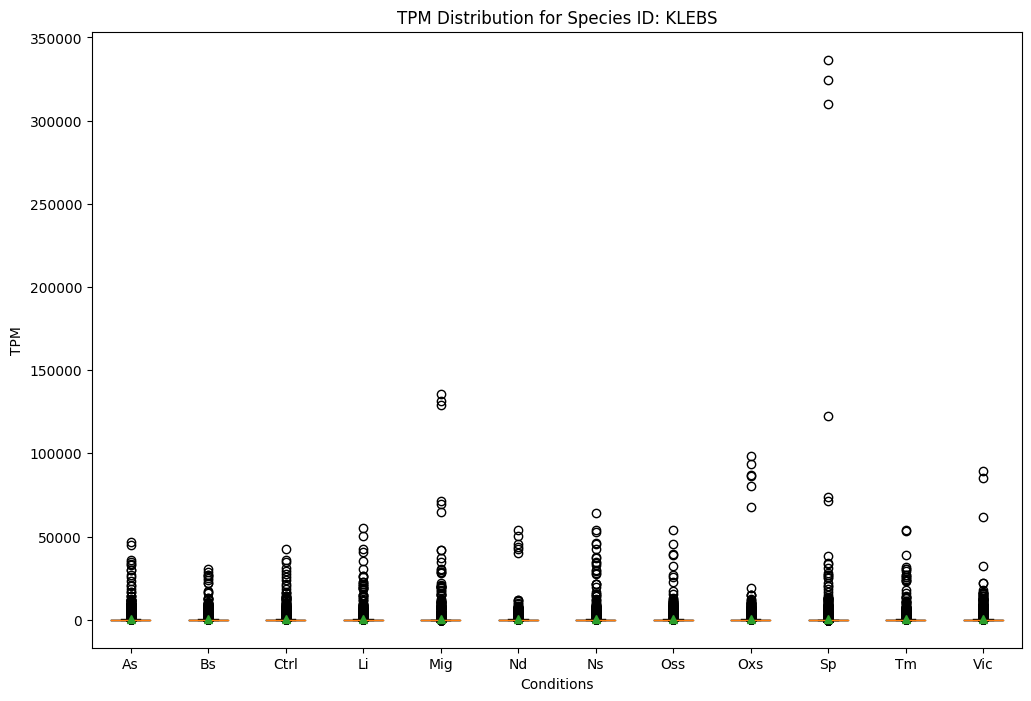

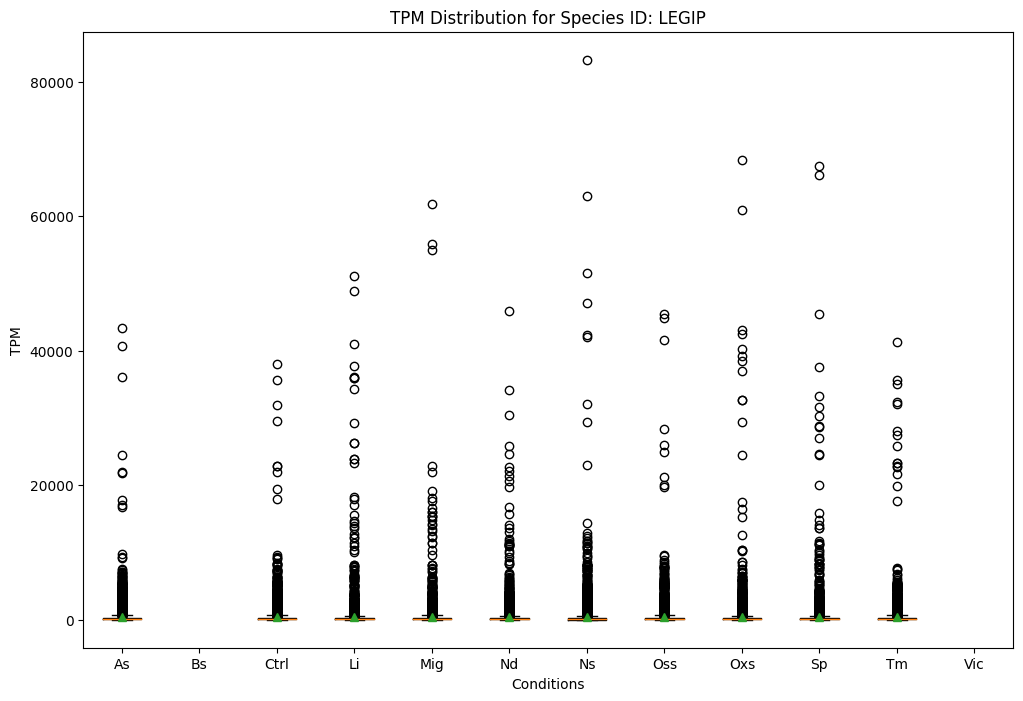

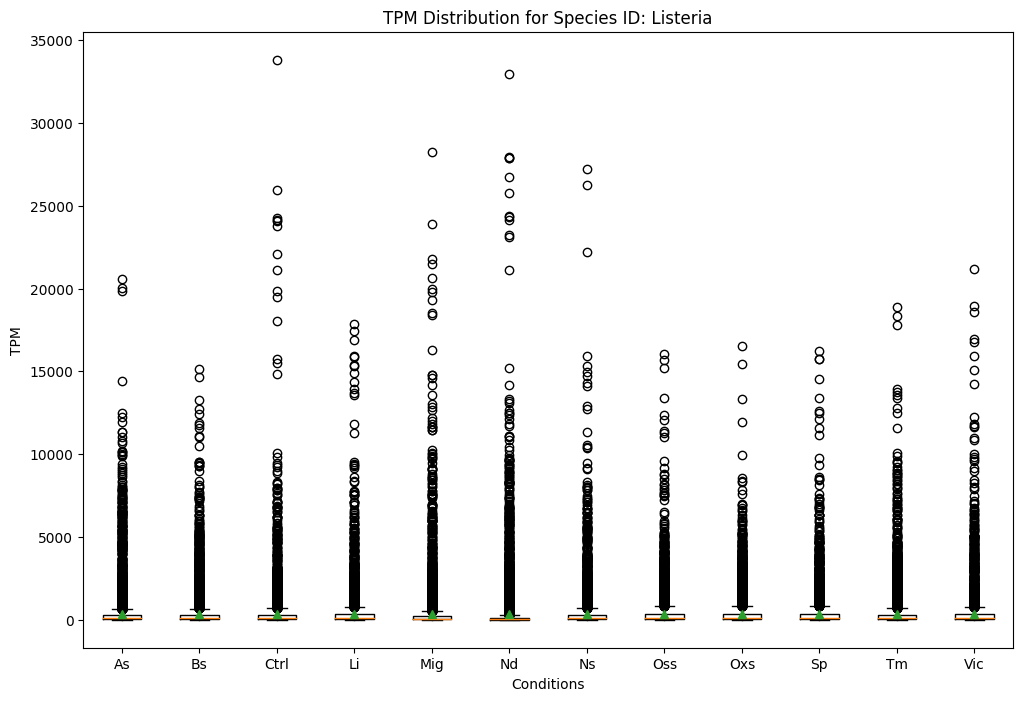

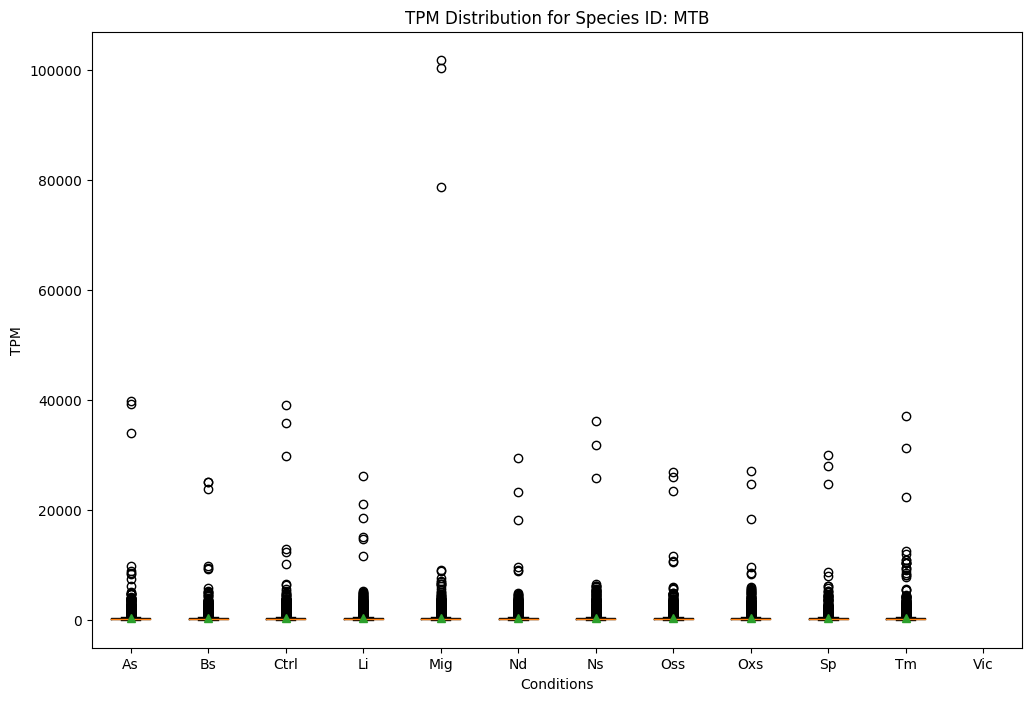

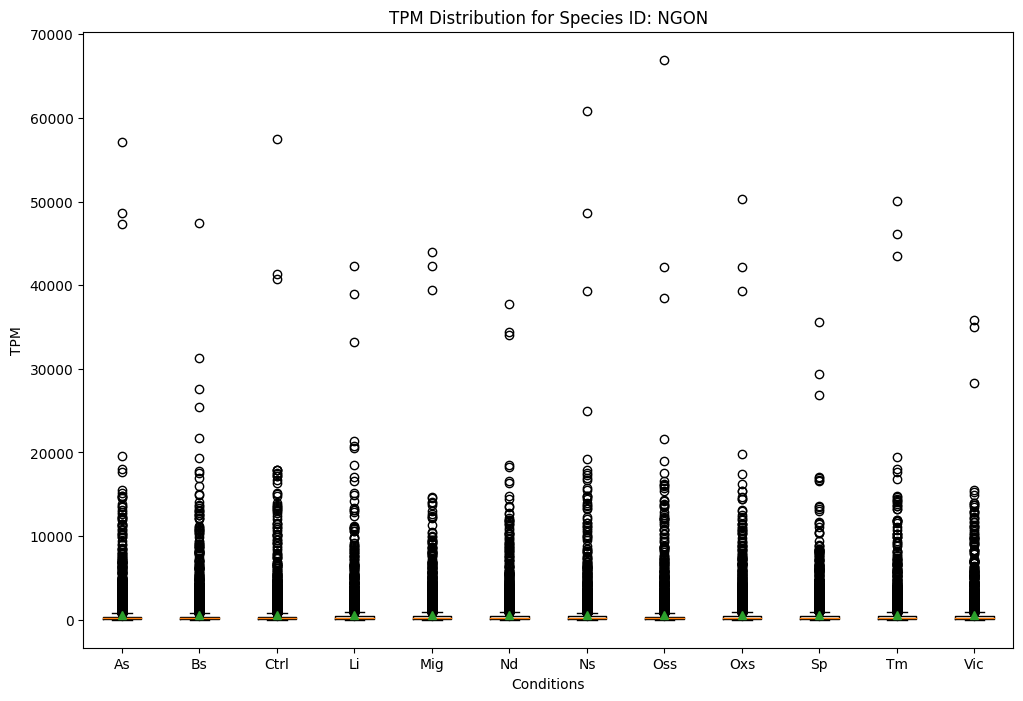

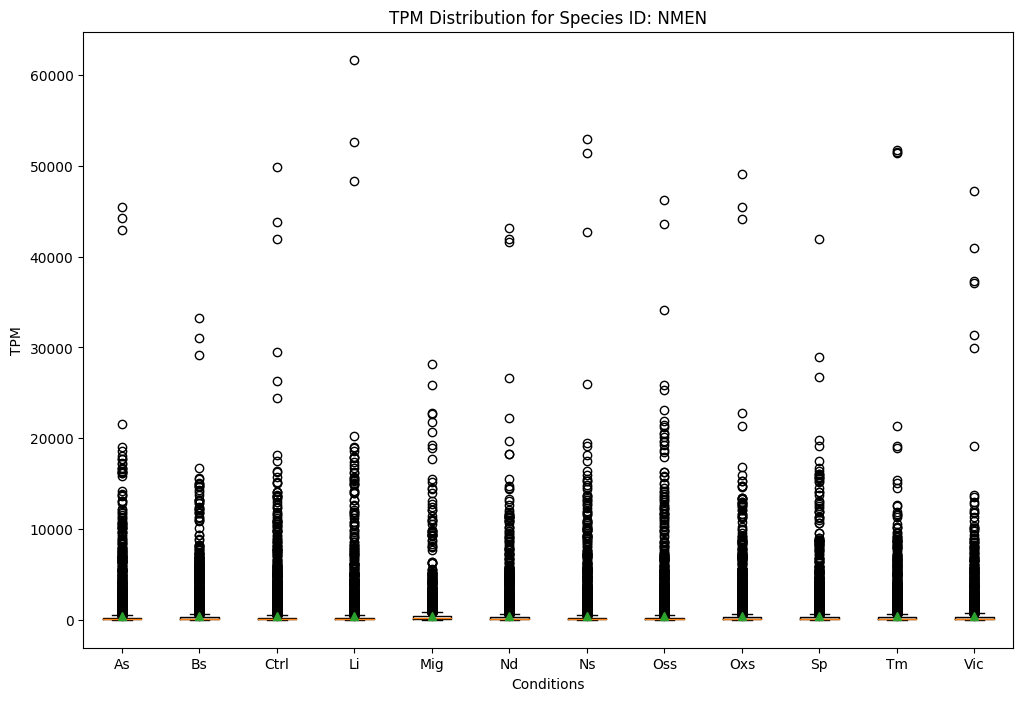

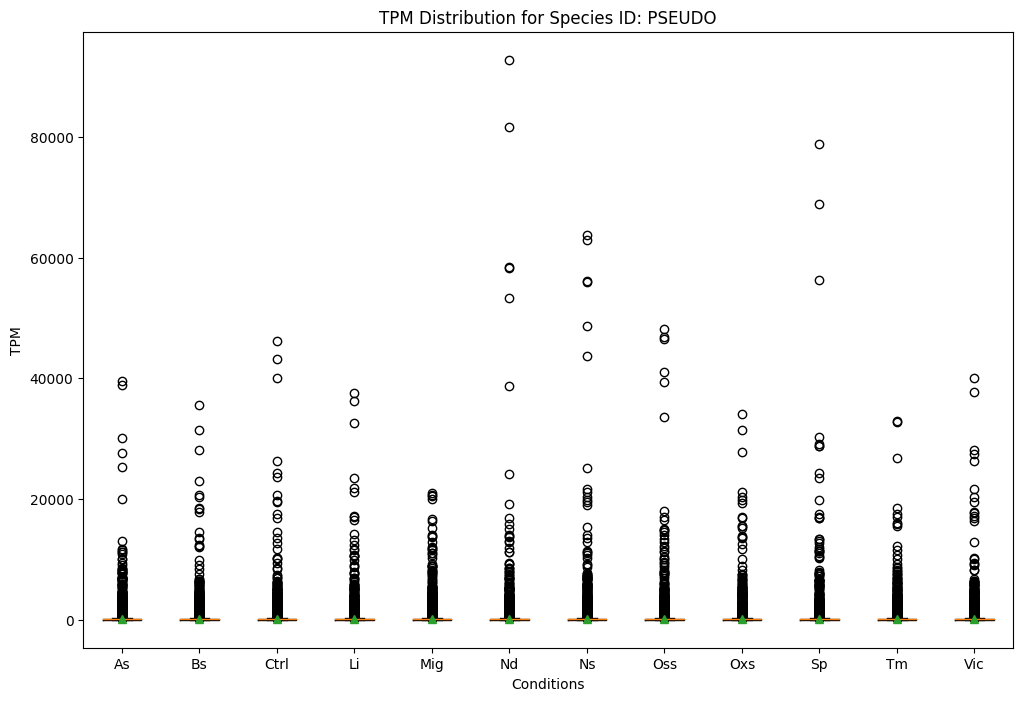

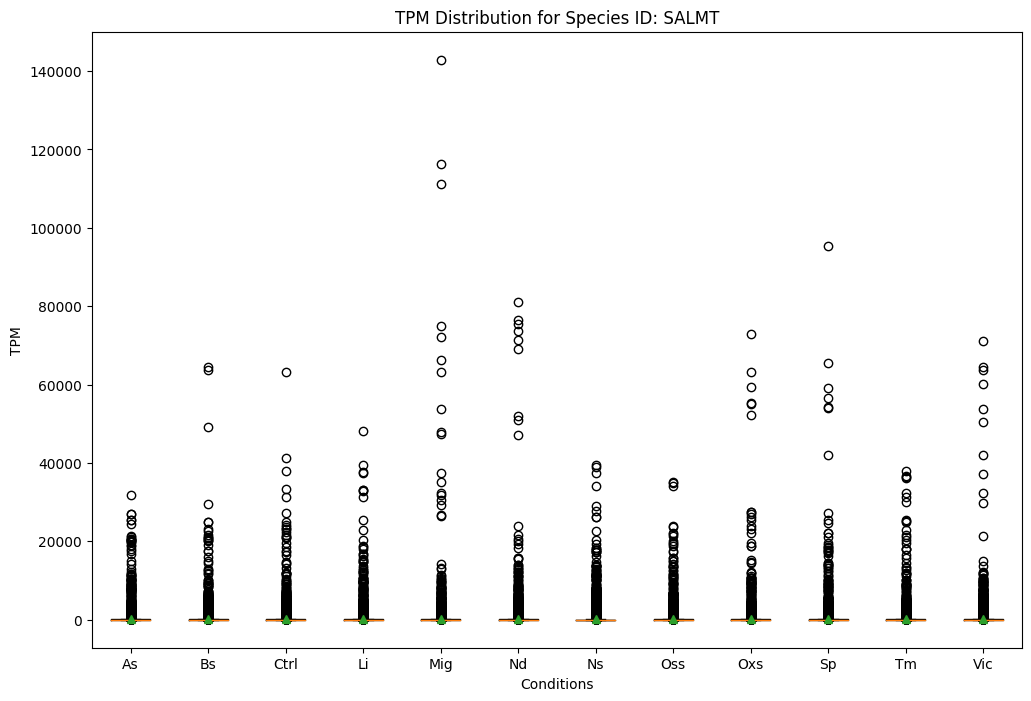

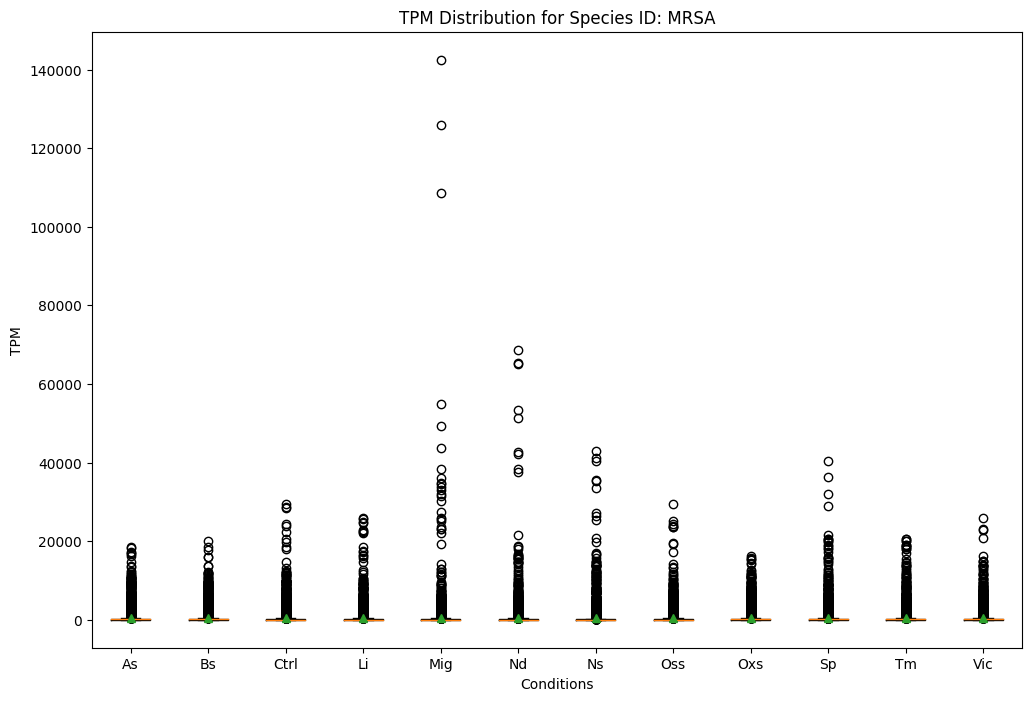

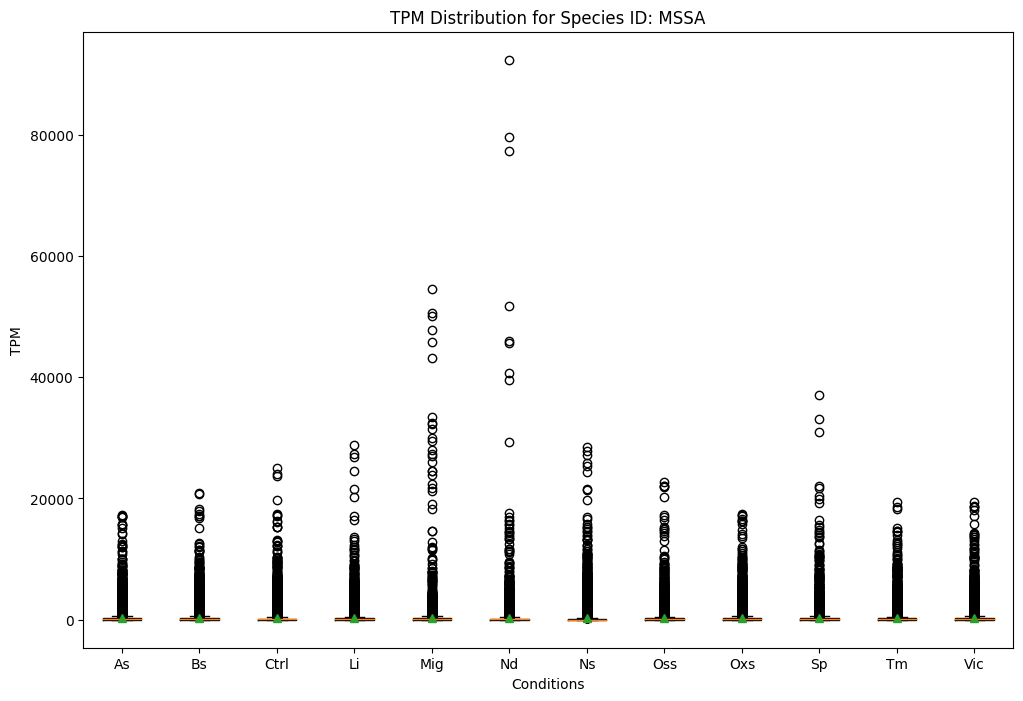

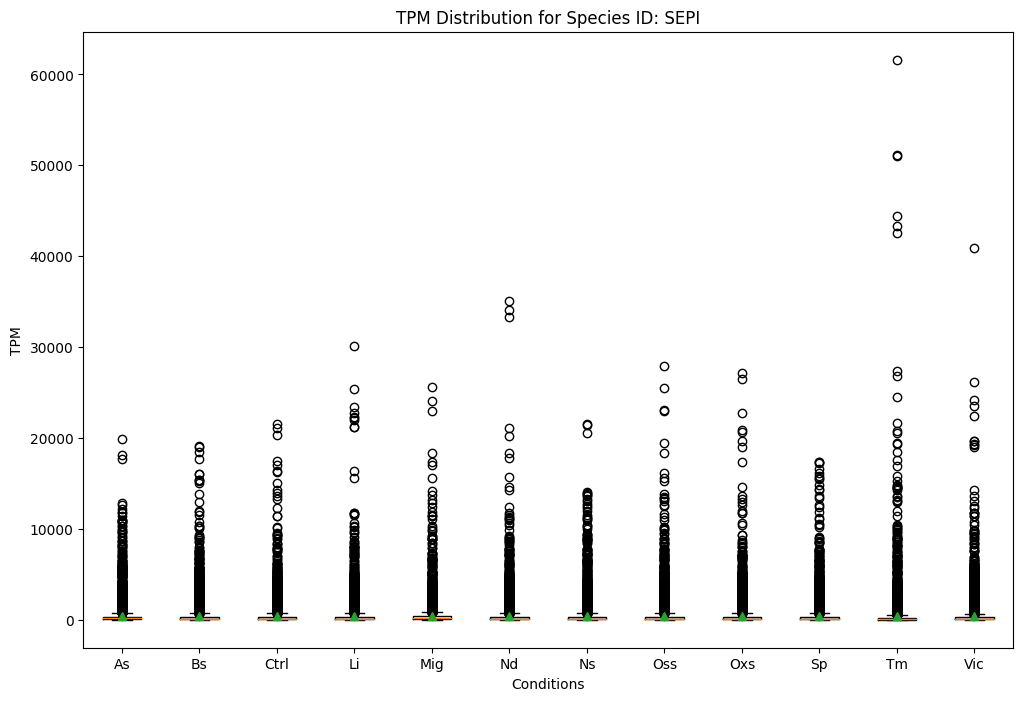

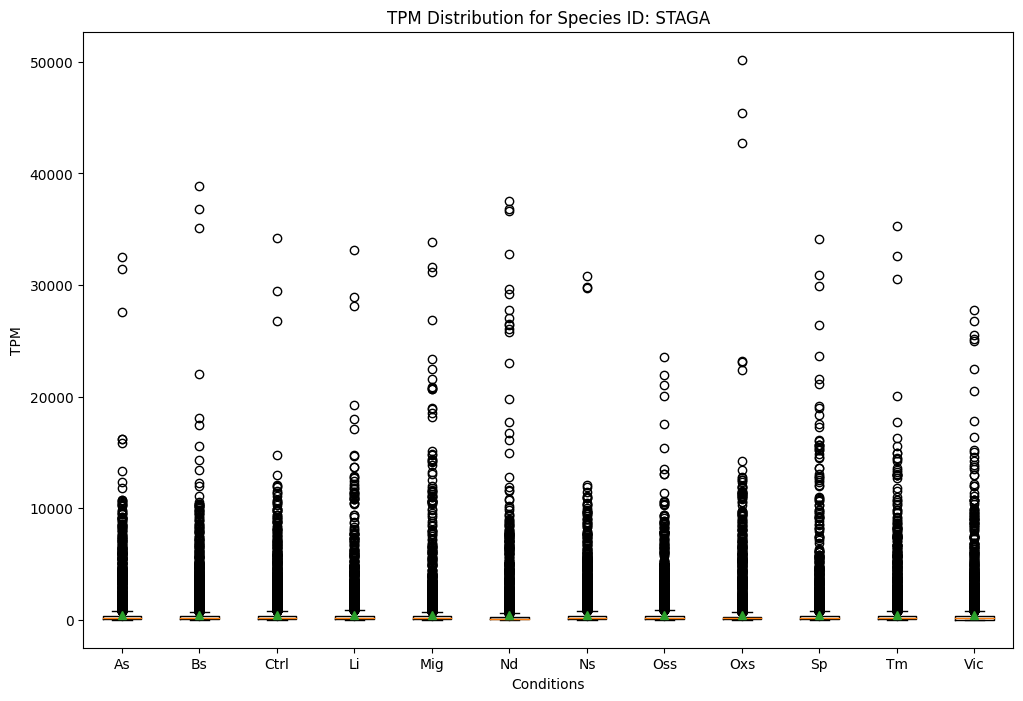

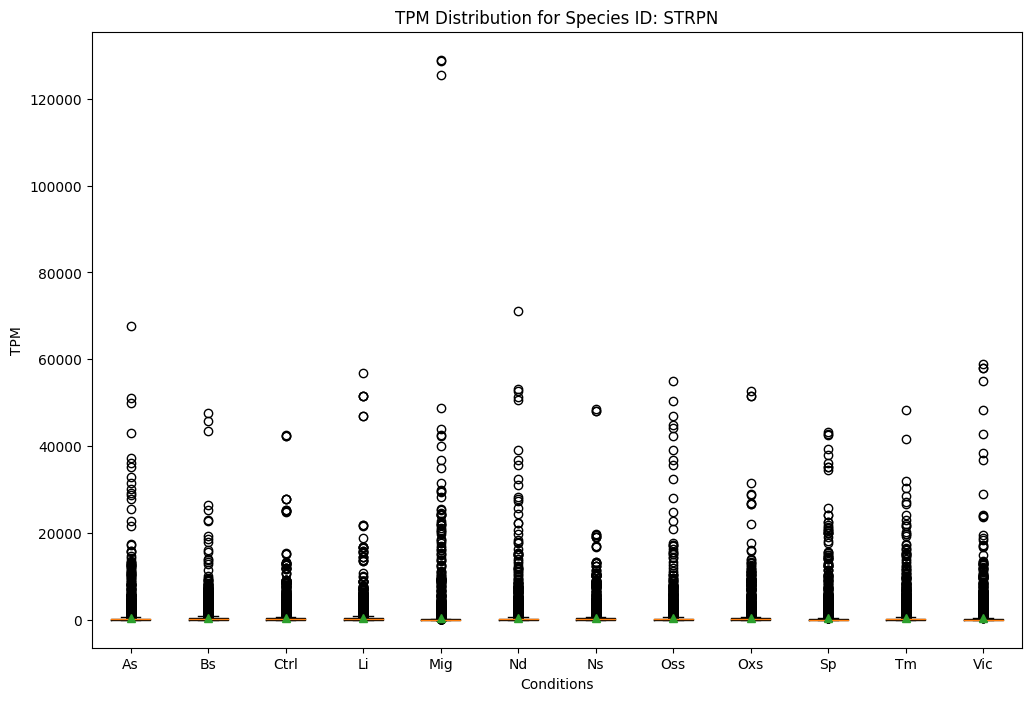

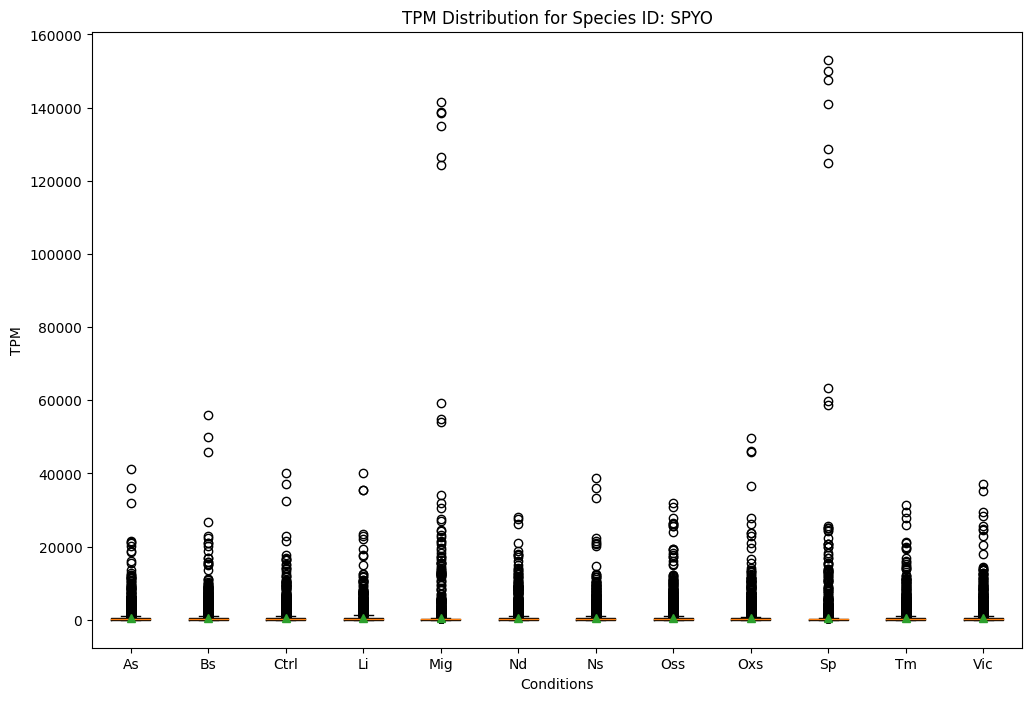

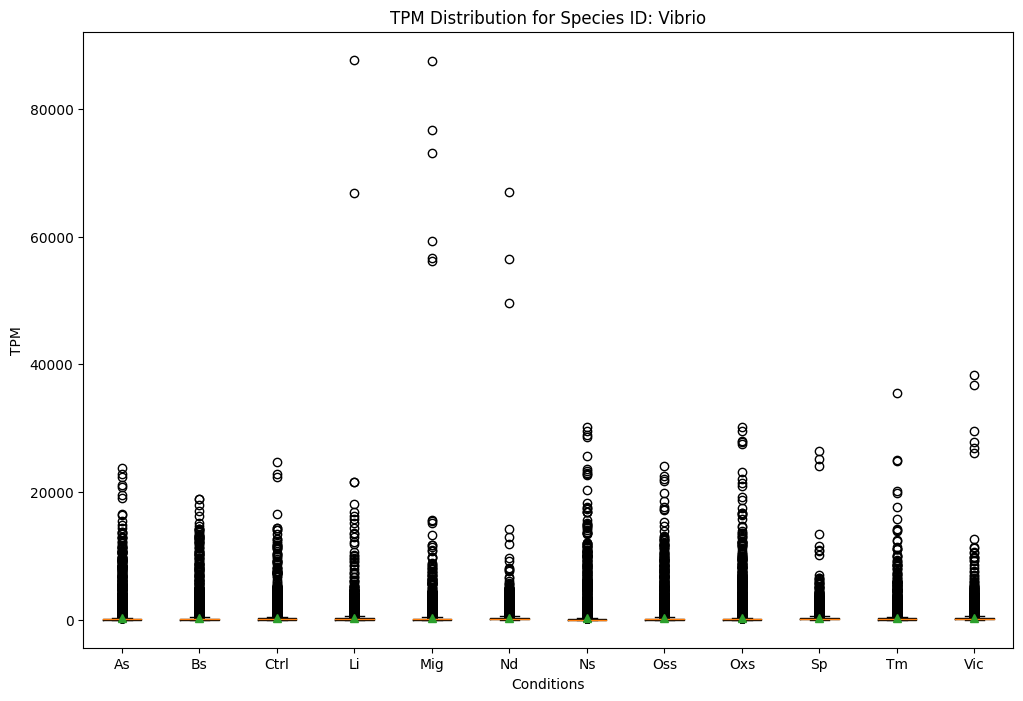

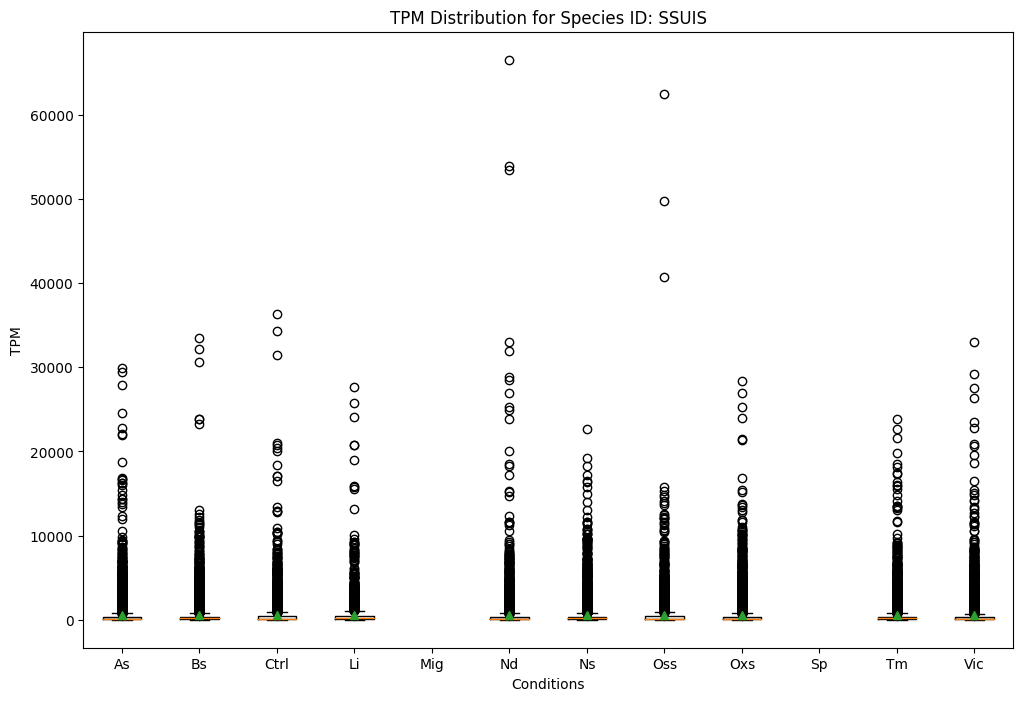

In [129]:
unique_species_ids = combined_data['Species ID'].unique()
conditions = [
    'As', 'Bs', 'Ctrl', 'Li', 'Mig', 'Nd', 'Ns', 'Oss', 'Oxs', 'Sp', 'Tm', 'Vic'
]
for species_id in unique_species_ids:
    # Filter data for current species ID据
    species_data = combined_data[combined_data['Species ID'] == species_id]

    # Create a chart for the current species ID
    plt.figure(figsize=(12, 8))

    # Initialize a dictionary to store the TPM values for each condition
    tpm_values = {condition: [] for condition in conditions}
    # Extract TPM columns for each condition
    for condition in conditions:
        for i in range(1, 4):
            col_name = f'{condition}_{i} (GE) - TPM'
            if col_name in combined_data.columns:
                tpm_values[condition].extend(species_data[col_name].dropna().tolist())

    # Plotting box lines
    plt.boxplot(tpm_values.values(), labels=tpm_values.keys(), showmeans=True)
    plt.title(f'TPM Distribution for Species ID: {species_id}')
    plt.xlabel('Conditions')
    plt.ylabel('TPM')
    plt.show()

In [13]:

# Extract conditional columns (remove first four and last two columns)
conditions = combined_data.columns[4:-2]
# Create a dictionary to store the absence of each Species ID for each condition
missing_tpm_data = {}

# Iterate over each Species ID
for species_id in combined_data['Species ID'].unique():
    missing_tpm_data[species_id] = {}
    # Filter out all rows for the current Species ID
    species_data = combined_data[combined_data['Species ID'] == species_id]

    for condition in conditions:
        # Missing Values Calculated
        missing_count = species_data[condition].isna().sum()
        if missing_count > 0:
            missing_tpm_data[species_id][condition] = missing_count

# Print the results, only if there are missing values
for species_id, condition_data in missing_tpm_data.items():
    if condition_data:
        print(f"Species ID: {species_id}")
        for condition, missing_count in condition_data.items():
            print(f"  {condition}: {missing_count} missing TPM values")

Species ID: BBURG
  Bs_1 (GE) - TPM: 1391 missing TPM values
  Bs_2 (GE) - TPM: 1391 missing TPM values
  Bs_3 (GE) - TPM: 1391 missing TPM values
Species ID: BURK
  Bs_1 (GE) - TPM: 5726 missing TPM values
  Bs_2 (GE) - TPM: 5726 missing TPM values
  Bs_3 (GE) - TPM: 5726 missing TPM values
Species ID: HINF
  Bs_1 (GE) - TPM: 1853 missing TPM values
  Bs_2 (GE) - TPM: 1853 missing TPM values
  Bs_3 (GE) - TPM: 1853 missing TPM values
Species ID: HP_G27
  Bs_1 (GE) - TPM: 1574 missing TPM values
  Bs_2 (GE) - TPM: 1574 missing TPM values
  Bs_3 (GE) - TPM: 1574 missing TPM values
Species ID: HPJ99
  Bs_1 (GE) - TPM: 1562 missing TPM values
  Bs_2 (GE) - TPM: 1562 missing TPM values
  Bs_3 (GE) - TPM: 1562 missing TPM values
Species ID: LEGIP
  Bs_1 (GE) - TPM: 2943 missing TPM values
  Bs_2 (GE) - TPM: 2943 missing TPM values
  Bs_3 (GE) - TPM: 2943 missing TPM values
  Vic_1 (GE) - TPM: 2943 missing TPM values
  Vic_2 (GE) - TPM: 2943 missing TPM values
  Vic_3 (GE) - TPM: 2943 missin

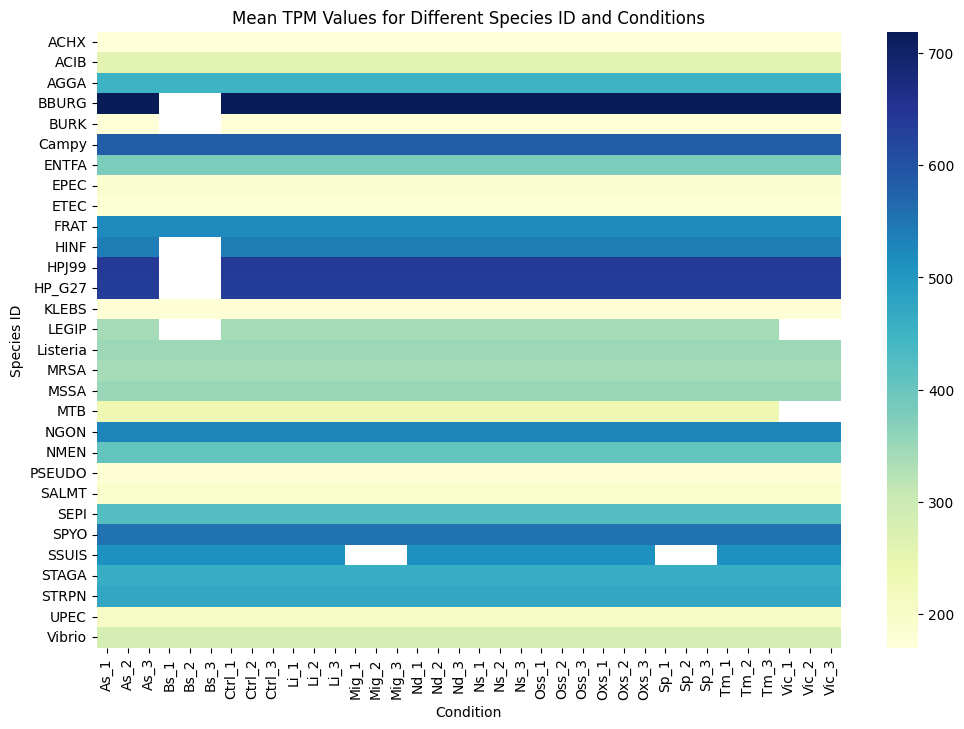

In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



# Select relevant columns for heatmap
columns = ['Species ID',
           'As_1 (GE) - TPM', 'As_2 (GE) - TPM', 'As_3 (GE) - TPM',
           'Bs_1 (GE) - TPM', 'Bs_2 (GE) - TPM', 'Bs_3 (GE) - TPM',
           'Ctrl_1 (GE) - TPM', 'Ctrl_2 (GE) - TPM', 'Ctrl_3 (GE) - TPM',
           'Li_1 (GE) - TPM', 'Li_2 (GE) - TPM', 'Li_3 (GE) - TPM',
           'Mig_1 (GE) - TPM', 'Mig_2 (GE) - TPM', 'Mig_3 (GE) - TPM',
           'Nd_1 (GE) - TPM', 'Nd_2 (GE) - TPM', 'Nd_3 (GE) - TPM',
           'Ns_1 (GE) - TPM', 'Ns_2 (GE) - TPM', 'Ns_3 (GE) - TPM',
           'Oss_1 (GE) - TPM', 'Oss_2 (GE) - TPM', 'Oss_3 (GE) - TPM',
           'Oxs_1 (GE) - TPM', 'Oxs_2 (GE) - TPM', 'Oxs_3 (GE) - TPM',
           'Sp_1 (GE) - TPM', 'Sp_2 (GE) - TPM', 'Sp_3 (GE) - TPM',
           'Tm_1 (GE) - TPM', 'Tm_2 (GE) - TPM', 'Tm_3 (GE) - TPM',
           'Vic_1 (GE) - TPM', 'Vic_2 (GE) - TPM', 'Vic_3 (GE) - TPM']

# Extract the data
data = combined_data[columns]

# Aggregate TPM values using mean for each 'Species ID' and condition combination
agg_data = data.groupby('Species ID').mean().reset_index()

# Step 4: Create Heatmap
# Pivot the data to have Species ID as index and conditions as columns
pivot_data = agg_data.melt(id_vars='Species ID', var_name='Condition', value_name='TPM')

# Convert 'Condition' column to just the condition name without ' (GE) - TPM'
pivot_data['Condition'] = pivot_data['Condition'].apply(lambda x: x.split(' ')[0])

# Create heatmap using seaborn
plt.figure(figsize=(12, 8))
heatmap = sns.heatmap(pivot_data.pivot(index='Species ID', columns='Condition', values='TPM'), cmap='YlGnBu', fmt=".1f")
plt.title('Mean TPM Values for Different Species ID and Conditions')
plt.show()
